<a href="https://colab.research.google.com/github/sukilsiva/Machine-Learnig-Deep-Learning-Code/blob/master/ANN_Model_Using_Pytorch_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN_Model_Using_Pytorch**

**Aim :**

* Our Primary aim is to find the people who are having Diabetes with an Given data  

**Methodologies :**

* Here we are Going to Build the ANN Model using **Pytorch** Which is going to train on the model that can classify the diabetic cases and predict the output

In [96]:
print(torch.__version__)

1.1.0


In [90]:
### read the Data 
import pandas as pd
df=pd.read_csv("/content/Pytorch-Tutorial/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df.isnull().sum()  # Checking For Null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
import seaborn as sns # Seaborn Library for Data Analysis

In [97]:
df["Outcome_analysis"] = df["Outcome"].replace(to_replace={1:"Diabetic",0:"Non-Diabetic"}) # Since the parametre hue in seaborn can understand only the categorical data

### Alternate Method for this
"""
import numpy as np
df[Outcome_analysis] = np.where(df["Outcome"]==1,"Diabetic","Non-Diabetic")
"""

'\nimport numpy as np\ndf[Outcome_analysis] = np.where(df["Outcome"]==1,"Diabetic","Non-Diabetic")\n'

In [98]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_analysis
0,6,148,72,35,0,33.6,0.627,50,1,Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,1,Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,1,Diabetic


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


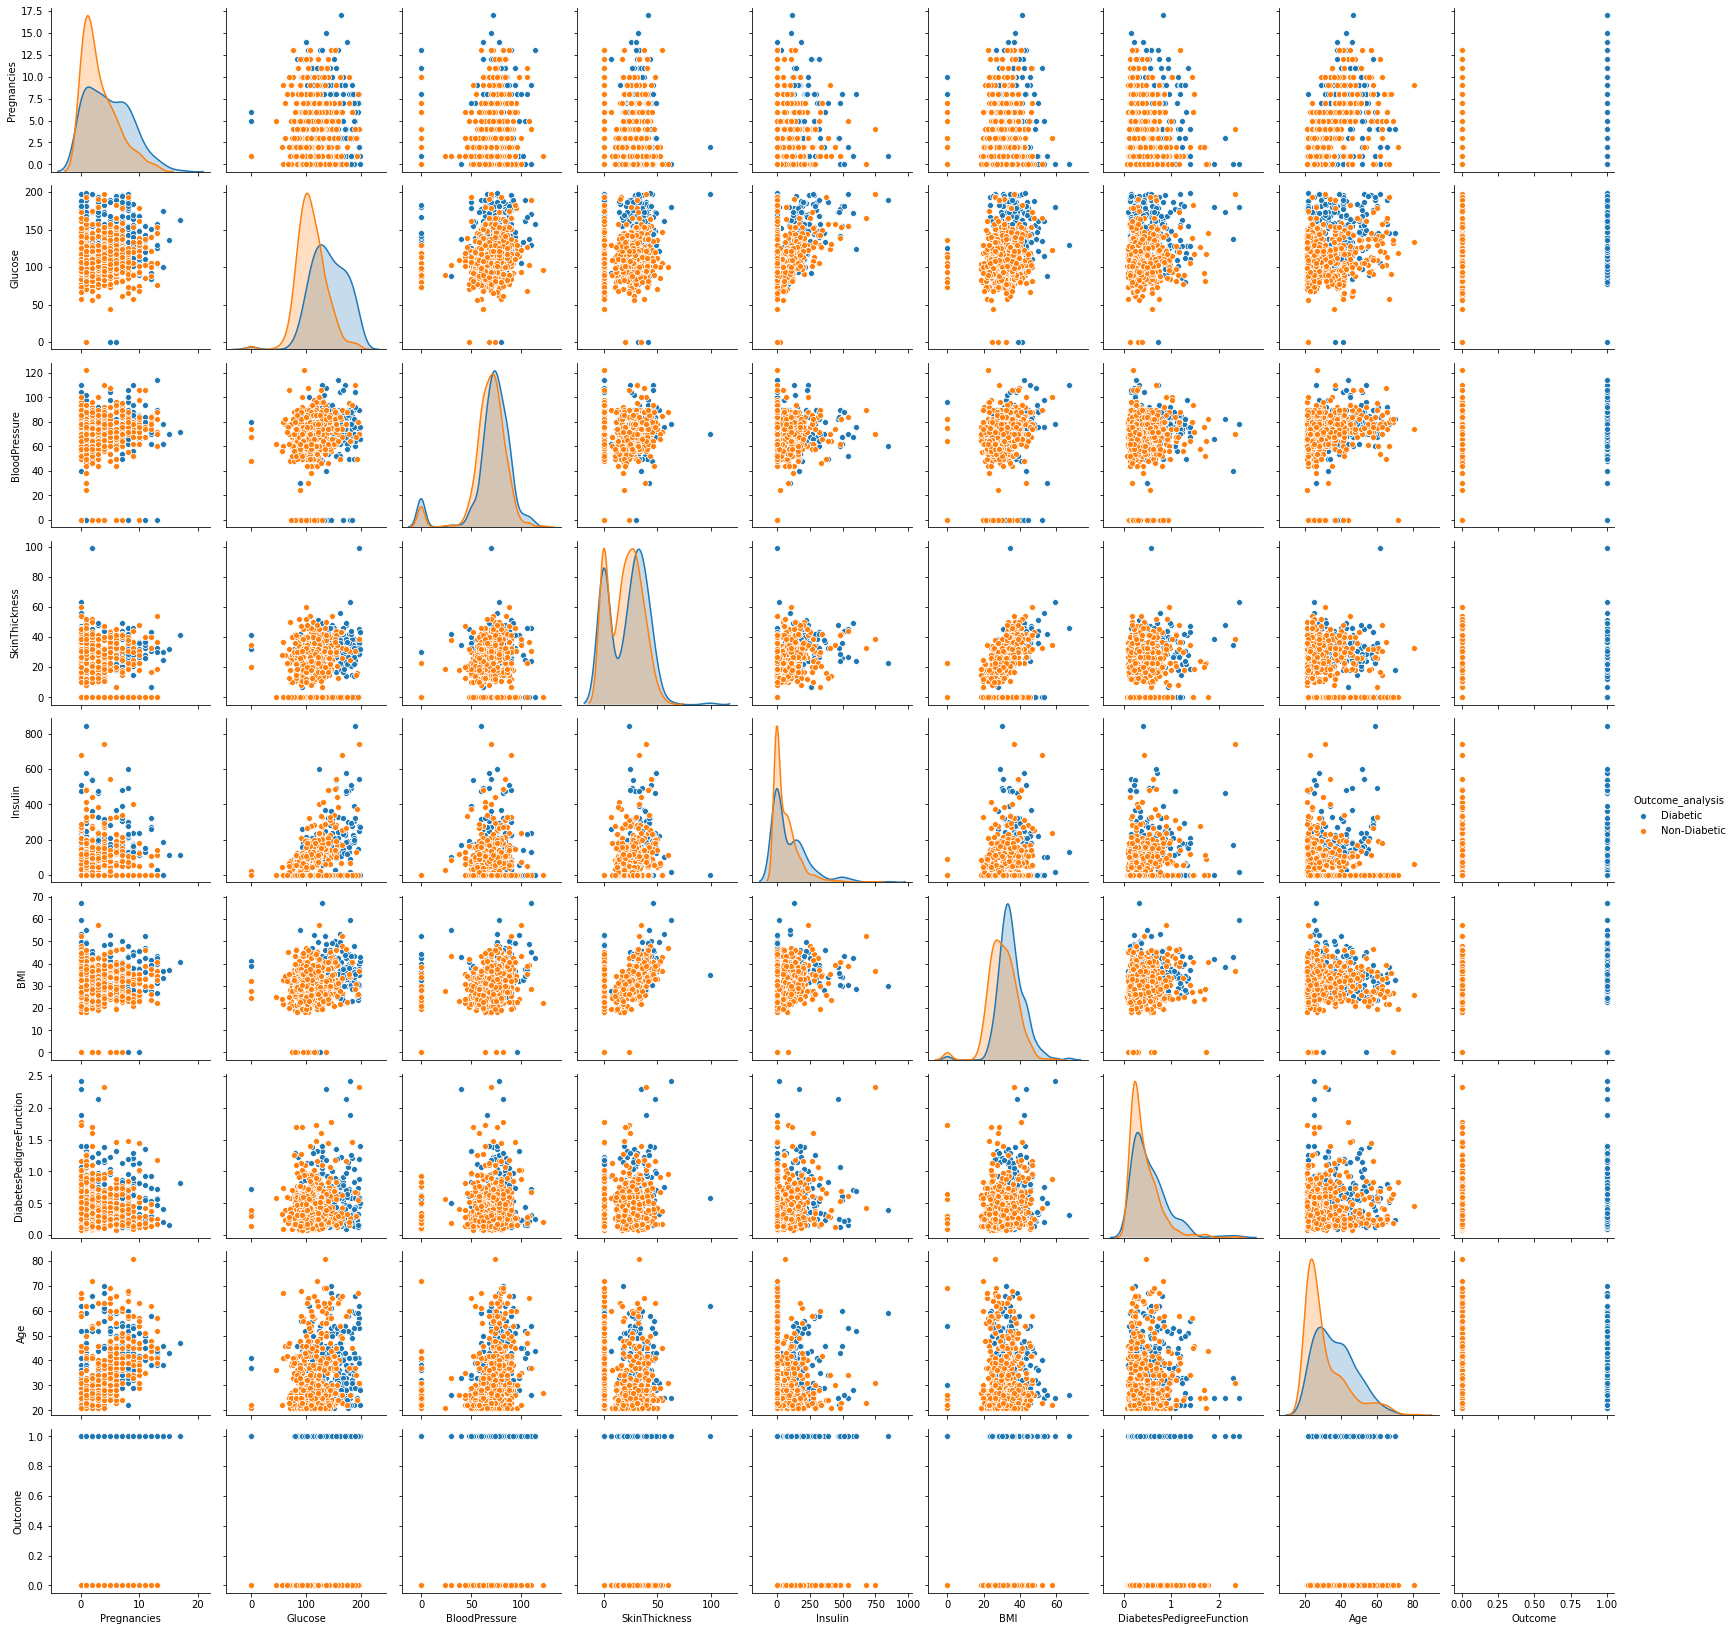

In [94]:
sns.pairplot(df,hue="Outcome_analysis")

In [101]:
df = df.drop("Outcome_analysis", axis=1) #Bring the data back to riginal Format

In [67]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) # Splitting the training and testing data

In [69]:
#### Libraries From Pytorch
import torch
import torch.nn as nn      # This Module contains neccesary codes to build the Neural Networks in pytorch
import torch.nn.functional as F # This Module contains the neccesary Codes for the activation function etc...

In [70]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

* In the torch Neural Networks the independant features must be in Float tensor format

* In the torch Neural Networks its better to have dependent features in Long tensor Format

In [71]:
df.shape  # reading the shape to specify the input shape of Model

(768, 9)

In [72]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):  # Inherit the nn module into class where we are going to build the ANN Model
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2): # here there are 8 input_features, 20 nodes in hiddel layer 1  and 2
        super().__init__() # Run the parent class
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [73]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model() 

In [74]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [102]:
model.parameters() # This proves the model paramaters are in generator format

<generator object Module.parameters at 0x7fa3c83db518>

In [75]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [76]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019440770149231
Epoch number: 21 and the loss : 0.6088424324989319
Epoch number: 31 and the loss : 0.591346800327301
Epoch number: 41 and the loss : 0.5686198472976685
Epoch number: 51 and the loss : 0.5580592155456543
Epoch number: 61 and the loss : 0.5439401865005493
Epoch number: 71 and the loss : 0.5333855748176575
Epoch number: 81 and the loss : 0.5232769250869751
Epoch number: 91 and the loss : 0.5130768418312073
Epoch number: 101 and the loss : 0.5051326155662537
Epoch number: 111 and the loss : 0.4962230324745178
Epoch number: 121 and the loss : 0.4896742105484009
Epoch number: 131 and the loss : 0.48536428809165955
Epoch number: 141 and the loss : 0.47758036851882935
Epoch number: 151 and the loss : 0.47442054748535156
Epoch number: 161 and the loss : 0.4697360098361969
Epoch number: 171 and the loss : 0.4610406756401062
Epoch number: 181 and the loss : 0.4690503478050232
Epoch number: 191 and 

In [77]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

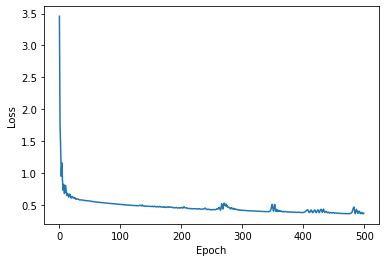

In [78]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [79]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0


In [80]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[94, 13],
       [21, 26]])

Text(69.0, 0.5, 'Predicted Values')

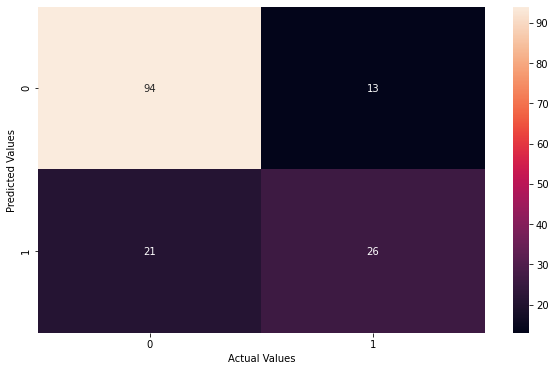

In [81]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [82]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)

In [83]:
#### Save the model
torch.save(model,'diabetes.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [84]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [85]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [86]:
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [87]:
new_data=torch.tensor(lst1)

In [88]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.3438, 1.4155])
1


# **Conclusion :**

* From this the Model is been prepared 

* To increase the accuracy we need to increase the Number of Hidden layers or doing the Hyperparametre tuning 

* This Model i have done only for Educational Purpose